In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


from keras.layers import Dense, Input, Dropout
from keras.models import Model

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [3]:
X = data[:, 2:]
y = data[:, 1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [6]:
y_oe_hot = ohe.fit_transform((y % 2).reshape(-1, 1)).todense()

In [46]:
in_layer = Input(shape=[784], name="input")
dense_1 = Dense(200, activation="tanh", name="1")(in_layer)
dense_21 = Dense(100, activation="tanh", name="21")(dense_1)
dense_22 = Dense(100, activation="tanh", name="22")(dense_1)
dense_31 = Dense(50, activation="tanh", name="31")(dense_21)
dense_32 = Dense(50, activation="tanh", name="32")(dense_22)
out1 = Dense(10, activation="softmax", name="o1")(dense_31)
out2 = Dense(2, activation="softmax", name="o2")(dense_32)

In [47]:
model = Model(inputs=[in_layer], outputs=[out1, out2])

In [48]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784)          0                                            
__________________________________________________________________________________________________
1 (Dense)                       (None, 200)          157000      input[0][0]                      
__________________________________________________________________________________________________
21 (Dense)                      (None, 100)          20100       1[0][0]                          
__________________________________________________________________________________________________
22 (Dense)                      (None, 100)          20100       1[0][0]                          
__________________________________________________________________________________________________
31 (Dense)

In [15]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [16]:
hist = model.fit(X, [y_hot, y_oe_hot], epochs=20, batch_size=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8000/8000 [==============================] - 1s 99us/step - loss: 1.6023 - dense_13_loss: 1.2116 - dense_14_loss: 0.3906 - dense_13_acc: 0.6349 - dense_14_acc: 0.8169
Epoch 2/20
8000/8000 [==============================] - 0s 42us/step - loss: 0.7943 - dense_13_loss: 0.5562 - dense_14_loss: 0.2381 - dense_13_acc: 0.8452 - dense_14_acc: 0.9046
Epoch 3/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.6148 - dense_13_loss: 0.4190 - dense_14_loss: 0.1958 - dense_13_acc: 0.8843 - dense_14_acc: 0.9246
Epoch 4/20
8000/8000 [==============================] - 0s 51us/step - loss: 0.5330 - dense_13_loss: 0.3642 - dense_14_loss: 0.1687 - dense_13_acc: 0.8942 - dense_14_acc: 0.9365
Epoch 5/20
8000/8000 [==============================] - 0s 45us/step - loss: 0.5012 - dense_13_loss: 0.3417 - dense_14_loss: 0.1595 - dense_13_acc: 0.8957 - dense_14_acc: 0.9385
Epoch 6/20
8000/8000 [==============================] - 0s 40u

In [18]:
model.evaluate(X, [y_hot, y_oe_hot])

8000/8000 [==============================] - 0s 38us/step


[0.2957042500674725, 0.20623761151731015, 0.08946663939952851, 0.93625, 0.9685]

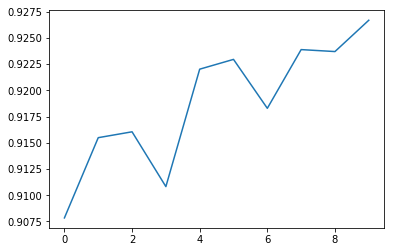

In [95]:
plt.plot(hist.history["acc"])

In [96]:
m2 = Model(inputs=[in_layer], outputs=[out])

In [97]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [98]:
m2.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 152us/step


[0.30848723076509704, 0.9090909090909091]

In [99]:
!push "l 14"

[master 2a038f2] l 14
 1 file changed, 151 insertions(+), 4 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 7.85 KiB | 7.85 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/coding-blocks-archives/ML-Noida-2019-June-Two.git
   b14b699..2a038f2  master -> master


In [30]:
import cv2

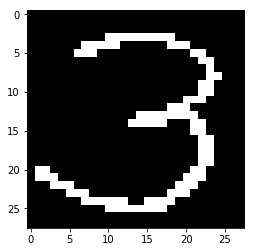

In [40]:
img = cv2.imread("../datasets/nums/three.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
small = cv2.resize(gray, (28, 28))
invert = (small < 100).astype(int) * 255
plt.imshow(invert, cmap="gray")

In [44]:
model.predict(np.array([invert.flatten()]))

[array([[3.6575264e-05, 1.1161515e-02, 4.1064318e-02, 7.3630852e-01,
         2.0327792e-03, 1.5706311e-03, 3.6761323e-03, 5.7077043e-02,
         6.8405181e-02, 7.8667343e-02]], dtype=float32),
 array([[0.2770844 , 0.72291553]], dtype=float32)]

In [42]:
np.argsort(model.predict(np.array([invert.flatten()]))[1], axis=1)

array([[0, 1]])

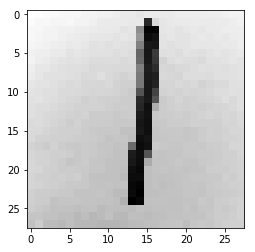

In [19]:
hist.history

{'loss': [1.6022592902183532,
  0.7942520260810852,
  0.6148224756121635,
  0.5329664349555969,
  0.5011713154613971,
  0.44885263293981553,
  0.4291425056755543,
  0.42512485161423685,
  0.42531693875789645,
  0.3962783917784691,
  0.3917501702904701,
  0.39040204845368864,
  0.36439042575657365,
  0.3528088998049498,
  0.33753792829811574,
  0.33209296576678754,
  0.32536632046103475,
  0.3312247548252344,
  0.3099793329834938,
  0.3153680432587862],
 'dense_13_loss': [1.2116095185279847,
  0.5561518333852291,
  0.419024670124054,
  0.3642256557941437,
  0.34167003631591797,
  0.3090803060680628,
  0.29850800186395643,
  0.28749289847910403,
  0.2930367451161146,
  0.27265078462660314,
  0.2582678012549877,
  0.26813033409416676,
  0.2550588320940733,
  0.2425862293690443,
  0.23239002227783204,
  0.22467496171593665,
  0.22251169867813586,
  0.22589131593704223,
  0.21222985535860062,
  0.21756733786314725],
 'dense_14_loss': [0.3906497672200203,
  0.238100191578269,
  0.19579780660

In [85]:
Dropout?

In [20]:
one = np.array([1, 2, 3, 4, 5])

In [21]:
two = np.array([10, 20, 30, 40, 50])

In [26]:
(one % 2) == 0

array([False,  True, False,  True, False])

In [25]:
two[np.array([False, True, False, True, True])]

array([20, 40, 50])

In [45]:
Dense?